In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from preambules_list import preambule_list, Preambule
from Functions.optimisation import CorrelationOptimisationMinimize
from preamble_optimisation import * # This is bad, but its already a workaround for Jupyter
from Functions.signal_generator import generate_ADSB, digitize_signal, normalize_signal, correlate_signals, signal_start_pause_length
from Functions.crc import generate_adsb_crc

optimisation_results = optimisation_start()

Result x:
1.00 0.34 0.69 0.59 0.57 0.32 0.01 0.32 0.15 0.25 0.17 0.55 0.17 0.56 0.32 -0.07 0.08 0.17 0.01 0.01 0.16 0.19 0.16 0.07 -0.01 -0.25 0.08 0.07 -0.08 -0.02 0.16 -0.07 0.01 -0.05 0.04 0.04 0.04 -0.04 0.04 0.01 -0.04 0.04 -0.04 0.01 0.03 -0.01 0.01 -0.04 0.01 0.03 

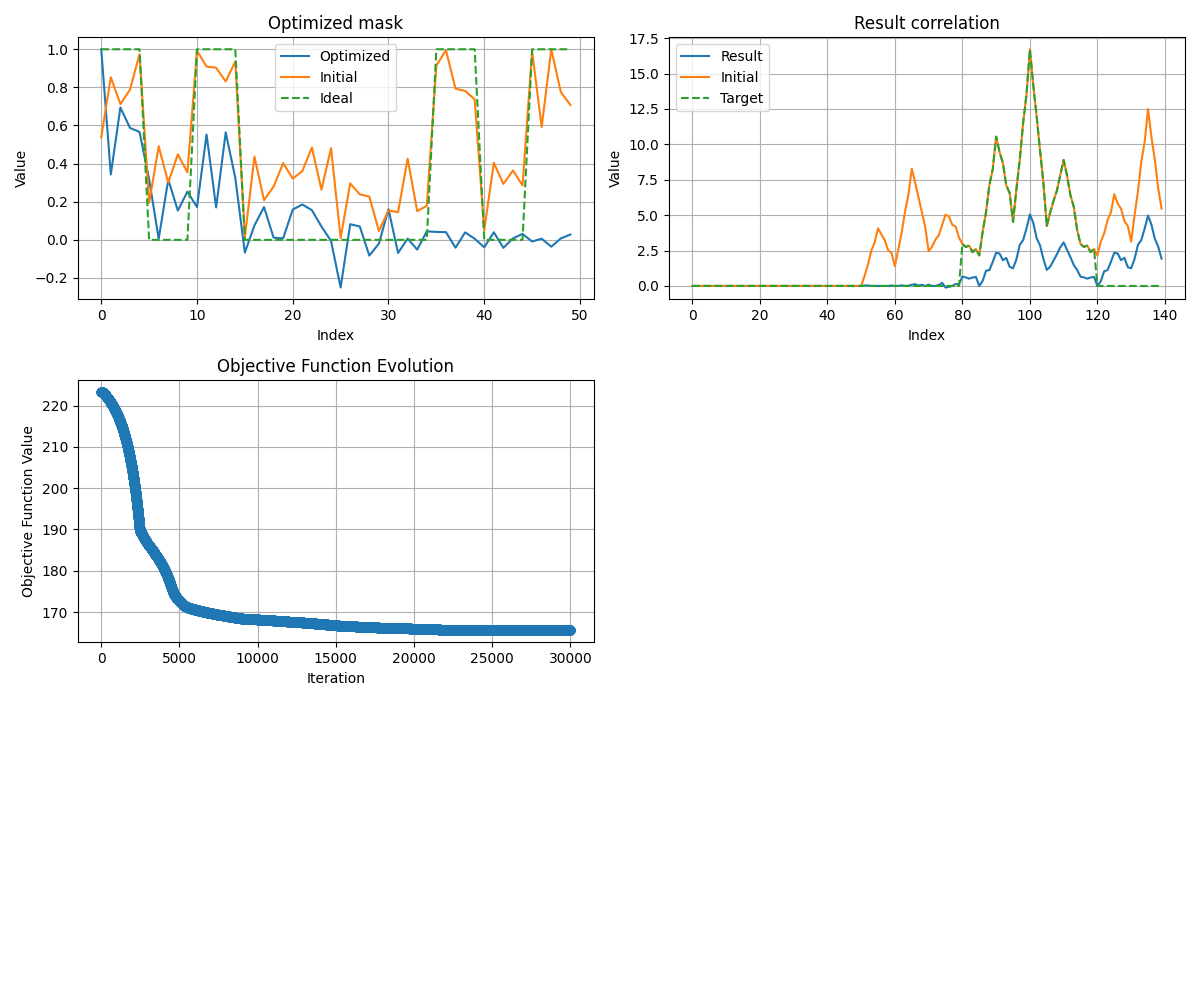

Optimization Result:
       message: Maximum number of iterations has been exceeded.
       success: False
        status: 2
           fun: 165.59039709630702
             x: [ 1.000e+00  3.430e-01 ...  7.558e-03  2.786e-02]
           nit: 30000
          nfev: 34649
 final_simplex: (array([[ 3.004e+00,  1.030e+00, ...,  2.270e-02,
                         8.368e-02],
                       [ 3.004e+00,  1.030e+00, ...,  2.278e-02,
                         8.374e-02],
                       ...,
                       [ 3.003e+00,  1.031e+00, ...,  2.279e-02,
                         8.366e-02],
                       [ 3.003e+00,  1.031e+00, ...,  2.257e-02,
                         8.374e-02]]), array([ 1.656e+02,  1.656e+02, ...,  1.656e+02,  1.656e+02]))


In [2]:
for optimisation_result in optimisation_results:
    result, history, objective_function = optimisation_result

    result_mask = normalize_signal(result.x)
    print("Result x:")
    [print(f"{x:.2f}", end =" ") for x in result_mask]

    # Extract data for plotting
    history = np.array(history)
    z_vals = np.array([objective_function(x) for x in history])

    result_corr = correlate_signals(target, result_mask)

    # Plot evolution of the objective function
    plt.figure(figsize=(12, 10))
    plt.subplot(321)
    plt.plot(result_mask, label="Optimized")
    plt.plot(initial_guess, label="Initial")
    plt.plot(preamble.get_coefficients(), '--', label = "Ideal")
    plt.title("Optimized mask")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.subplot(322)
    plt.title("Result correlation")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.plot(result_corr, label = "Result")
    plt.plot(initial_corr, label = "Initial")
    plt.plot(target_corr, '--', label = "Target")
    plt.legend()
    plt.grid()
    plt.subplot(323)
    plt.plot(z_vals, marker='o')
    plt.title("Objective Function Evolution")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Print optimization results
    print("Optimization Result:")
    print(result)

# TODO: siekti kad koreliacijos rezultatas atitinku vienetini impulsa
# TODO: atimti korelaicijos rezultata is vienetinio impulso ir isimti moduli kad siektu 0
# TODO: arba visa arba maziau duoti atskaitu